# Classificação e identificação de falhas de produtos em linha produtiva com redes neurais

In [1]:
from src import processings
from src.utils.images import plot_images, read_image

## Imagens originais

As imagens são processadas para ajustar os valores dos pixels, que originalmente variam de 0 a 255, para uma escala normalizada entre 0 e 1. Esses números representam a intensidade de cor, onde 0 é a mínima (preto) e 1 é a máxima (branco). A normalização facilita o processamento em algoritmos, como redes neurais, melhorando o desempenho e evitando problemas numéricos.

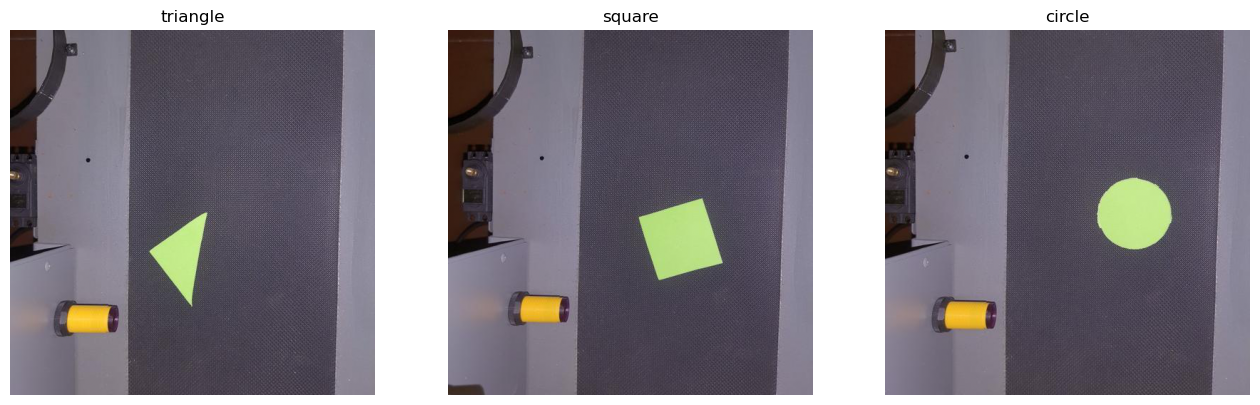

In [2]:
triangle = read_image("article/triangle.jpg") / 255
square = read_image("article/square.jpg") / 255
circle = read_image("article/circle.jpg") / 255

plot_images([triangle, square, circle], ["triangle", "square", "circle"])

## Extração do canal verde

Os canais vermelho e azul da imagem são descartados, preservando apenas o canal verde. Isso é realizado isolando a matriz correspondente ao canal verde na representação RGB da imagem. A escolha do canal verde é fundamentada em seu maior contraste com o plano de fundo, facilitando a segmentação da figura de interesse.

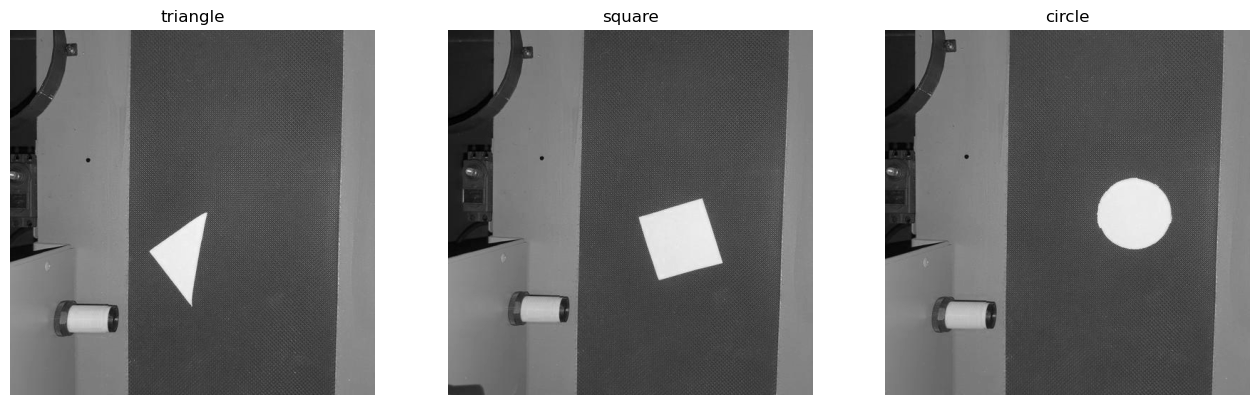

In [3]:
triangle = triangle[:, :, 1:2]
square = square[:, :, 1:2]
circle = circle[:, :, 1:2]

plot_images([triangle, square, circle], ["triangle", "square", "circle"])

## Elevação do contraste

A função de elevação de contraste utiliza operações morfológicas matemáticas para aumentar o contraste de uma imagem binária. Primeiramente, aplica a dilatação, que expande as regiões claras, realçando objetos e bordas. Em seguida, aplica a erosão, que reduz essas regiões, refinando o contraste. O uso combinado dessas operações destaca as estruturas da imagem, melhorando a visibilidade das bordas e acentuando as diferenças entre as áreas claras e escuras.

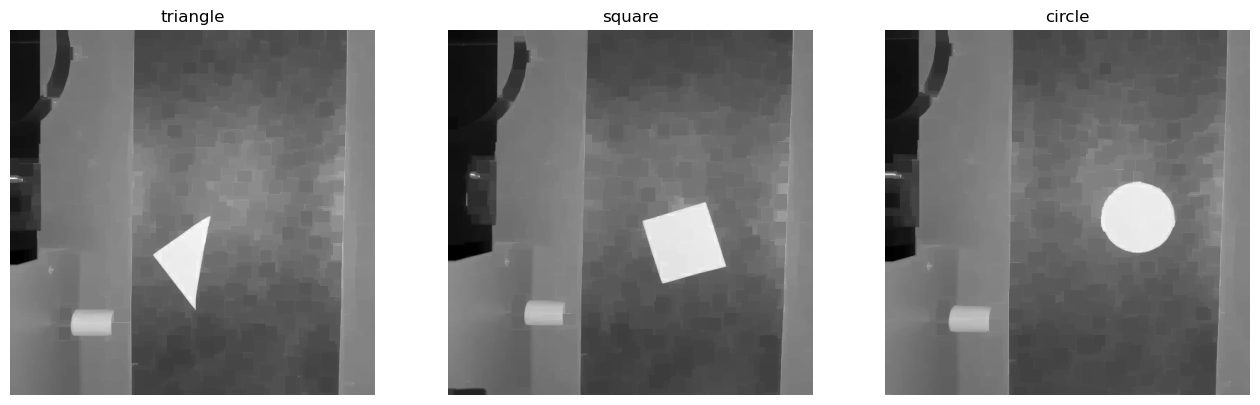

In [4]:
triangle = processings.enhance_contrast(triangle)
square = processings.enhance_contrast(square)
circle = processings.enhance_contrast(circle)

plot_images([triangle, square, circle], ["triangle", "square", "circle"])

## Função degrau unitário

A imagem processada é então convertida para preto e branco utilizando um limiar binário.

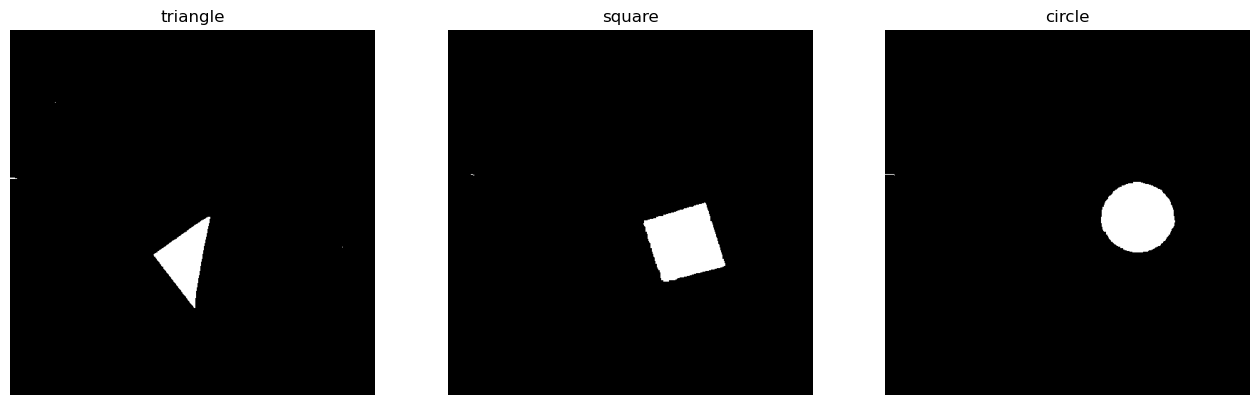

In [5]:
triangle = processings.heaviside(triangle, 0.85)
square = processings.heaviside(square, 0.85)
circle = processings.heaviside(circle, 0.85)

plot_images([triangle, square, circle], ["triangle", "square", "circle"])

## Remoção de ruídos

Nesta etapa, é aplicada uma função que remove pequenas regiões de uma imagem binária, mantendo apenas aquelas que têm um tamanho maior que o valor mínimo especificado. As regiões menores são descartadas, resultando em uma imagem com apenas as áreas relevantes.

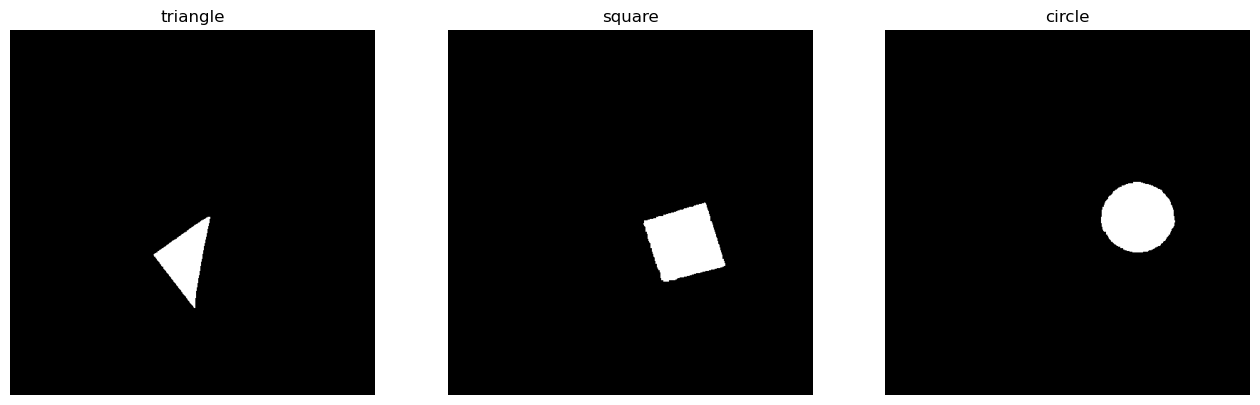

In [6]:
triangle = processings.remove_small_regions(triangle, 100)
square = processings.remove_small_regions(square, 100)
circle = processings.remove_small_regions(circle, 100)

plot_images([triangle, square, circle], ["triangle", "square", "circle"])